In [1]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.1
Numpy,1.18.4
SciPy,1.1.0
matplotlib,3.0.0
Cython,0.28.5
Number of CPUs,4
BLAS Info,OPENBLAS
IPython,6.5.0
Python,"3.5.6 |Anaconda, Inc.| (default, Aug 26 2018, 16:05:27) [MSC v.1900 64 bit (AMD64)]"
OS,nt [win32]


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from IPython.display import display, Math, Latex

In [4]:
# shared parameters
gamma = 1                        # decay rate
tlist = np.linspace(0, 13, 300)
taulist = tlist

# parameters for TLS with exponential shape wavepacket (short pulse)
tp_e = 0.060                     # Gaussian pulse parameter
Om_e = 19.40                     # driving strength
t_offset_e = 0.405
pulse_shape_e = Om_e / 2 * np.exp(-(tlist - t_offset_e) ** 2 /
                                  (2 * tp_e ** 2))

# parameters for TLS with Gaussian shape wavepacket (long pulse)
tp_G = 2.000                     # Gaussian pulse parameter
Om_G = 0.702                     # driving strength
t_offset_G = 5
pulse_shape_G = Om_G / 2 * np.exp(-(tlist - t_offset_G) ** 2 /
                                  (2 * tp_G ** 2))

In [5]:
# initial state
psi0 = fock(2, 0)              # ground state

# operators
sm = destroy(2)                # atomic lowering operator
n = [sm.dag()*sm]              # number operator

# Hamiltonian
H_I = sm + sm.dag()
H_e = [[H_I, pulse_shape_e]]
H_G = [[H_I, pulse_shape_G]]

# collapse operator that describes dissipation
c_ops = [np.sqrt(gamma) * sm]  # represents spontaneous emission

In [6]:
n_e = mesolve(H_e, psi0, tlist, c_ops, n).expect[0]
n_G = mesolve(H_G, psi0, tlist, c_ops, n).expect[0]

ImportError: Building module rhs101280 failed: ['distutils.errors.DistutilsPlatformError: Unable to find vcvarsall.bat\n']

NameError: name 'n_e' is not defined

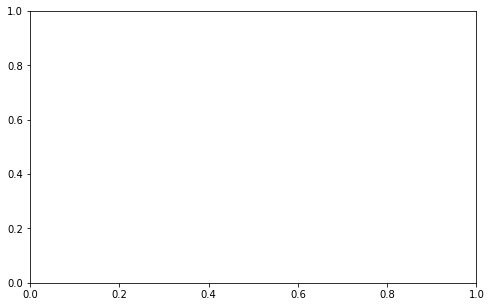

In [6]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, n_e, 'r', label="exponential wavepacket")
ax.plot(tlist, n_G, 'b', label="Gaussian wavepacket")
ax.legend()
ax.set_xlim(0, 13)
ax.set_ylim(0, 1)
ax.set_xlabel('Time, $t$ [$1/\gamma$]')
ax.set_ylabel('Emission flux [$\gamma$]')
ax.set_title('TLS emission shapes')